## Introduction to the Data Science Toolkit Project
For this introductory project I have downloaded analytical data of apple store applications, with the goal of using numpy,pandas, and matplotlib as my means of extracting useful and valuable insights of said data

#### Graph #1: average price per rating
The first insight that I wanted to bring to light was that of the relationship of prices of apps and their corresponding ratings. What I did was created the average price for each rating, showing if there is any correspondence between the rating of the app and the price paid.

What was discovered was that 1 star ratings were given on average to more costly apps, compared to the 2 and 3 star ratings. Then again 4 star ratings were given to more costly apps as well. What this data tells us is that the average user is more likely to either passionately love or hate an application if the price of said app is on average above 1.8 dollars american currency. 

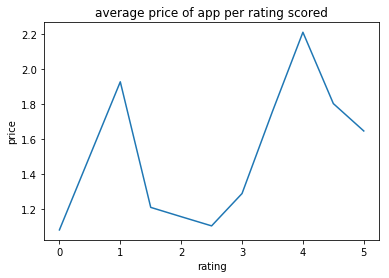

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandoc
%matplotlib inline

df = pd.read_csv('AppleStore.csv')
results_average_price = df.groupby('user_rating')['price'].aggregate(np.average)
plt.plot(results_average_price)
plt.xlabel('rating')
plt.ylabel('price')
plt.title('average price of app per rating scored')
plt.show()

#### Graph #2: bargraph and box plot of prices
Now Let us dive deeper into the price column of this data set. Creating a bargraph to show the range of the prices and the frequency in which prices are used. Then using a boxplot to see the density of prices

The plots show that most applications are indeed free and very rarely reach above the fifty dollar price tag. Showing the current trends in term of application prices



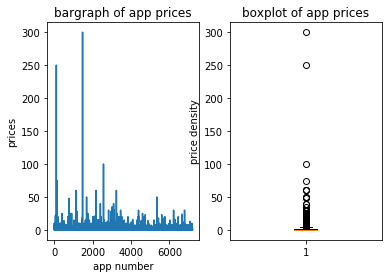

In [51]:
price_apps = df['price']
plt.subplot(1,2,1)
plt.plot(price_apps)
plt.ylabel('prices')
plt.xlabel('app number')
plt.title('bargraph of app prices')
plt.subplot(1,2,2)
plt.boxplot(price_apps)
plt.ylabel('price density')
plt.title('boxplot of app prices')
plt.show()

#### Graph #3: paid applications
Now lets eliminate the free applications to see what is going on in terms of only paid. Lets revisted our original graph only now with paid applications, to see how removing the densest price variable changes the information revealed

Interestingly it doesn't change the overall pattern of higher priced apps either being rated very low or very high on average. It does help show the impact free apps had on the previous graph and helps create a clearer picture of what price means to an individual that is rating the app

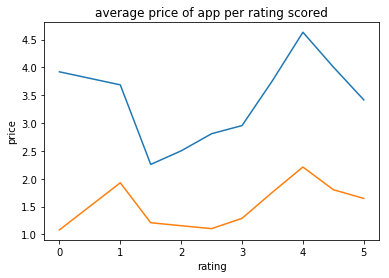

In [64]:
paid_app_data = df[df['price']>= .99]
paid_app_price = paid_app_data['price']
results_average_price_paid = paid_app_data.groupby('user_rating')['price'].aggregate(np.average)
plt.plot(results_average_price_paid)
plt.plot(results_average_price)
plt.xlabel('rating')
plt.ylabel('price')
plt.title('average price of app per rating scored')
plt.show()

#### Graph #4: free app ratings vs. paid app ratings
Now to see how ratings differ from paid apps to free apps, using a histogram to note differences in total individual ratings.

Now we see a very different picture painted in terms of ratings, showing that users tend to choose higher ratings regardless of price. yet that no ratings are higher among free apps, giving a greater consistancy to paid apps

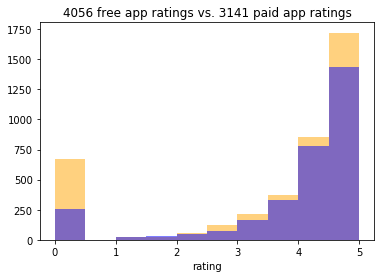

In [76]:
paid_app_ratings = paid_app_data['user_rating']
free_app_data = df[df['price'] == 0]
free_app_ratings = free_app_data['user_rating']
plt.hist(free_app_ratings, color='orange', alpha=.5)
plt.hist(paid_app_ratings, color='blue', alpha=.5)
plt.xlabel('rating')
plt.title('{} free app ratings vs. {} paid app ratings'.format(len(free_app_ratings),len(paid_app_ratings)))
plt.show()

#### Conclusion
The rating and pricing for applications shows an environment that is postive for most applications in general (graph 4). Yet when broken down to ratings by price (graph 1 and graph 3) and viewing the density of prices (graph 2) shows a very different picture, creating a correlation between price and rating. meaning that while the majority creates positive ratings, negative ratings are more probable when the application price is higher.